In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
from joblib import Memory

from lint.models import Token

mem = Memory('cache')

token_counts = mem.cache(Token.token_counts)

tokens = token_counts(50000)

________________________________________________________________________________
[Memory] Calling lint.models.token.token_counts...
token_counts(50000)
__________________________________________________token_counts - 837.2s, 14.0min


In [57]:
import numpy as np

def rel_series(token, *args, **kwargs):
    
    series = Token.token_series(token, *args, **kwargs)
    
    total_count = sum(series.values())
    
    f_obs = np.zeros(100)
    
    for offset, count in series.items():
        f_obs[offset] = count/total_count
        
    return f_obs

In [58]:
def plot_time_slices(token, y1=1840, y2=2000, w=20):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    cm = plt.get_cmap('Blues')
    
    slices = range(y1, y2, w)
    
    colors = [
        cm(1.*i/len(slices))
        for i in range(len(slices))
    ]
    
    ax.set_color_cycle(colors)
    
    for y in slices:
        
        series = rel_series(token, year1=y, year2=y+w)
        ax.plot(series)
        
    print(token)
    plt.show()

the


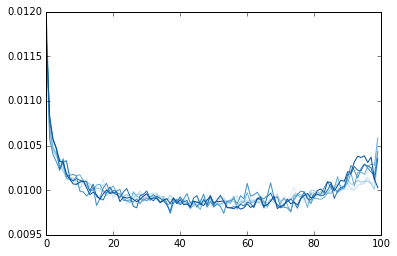

had


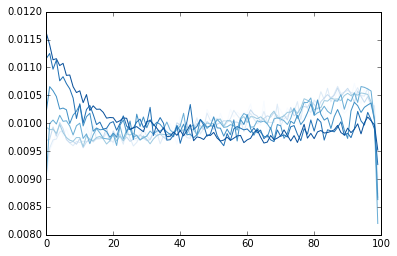

twenty-five


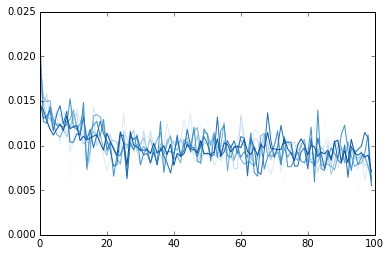

soil


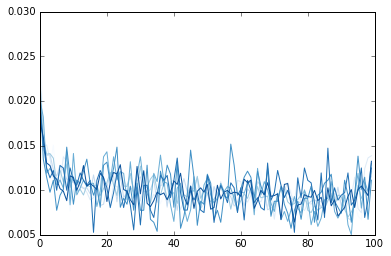

In [65]:
plot_time_slices('the')
plot_time_slices('had')
plot_time_slices('twenty-five')
plot_time_slices('soil')

In [63]:
keys = list(tokens.keys())
print(keys[-10:])

['regarding', 'daylight', 'brushed', 'deadly', 'tenderly', 'soil', 'shared', 'plant', 'owned', 'twenty-five']


In [60]:
def movement(token, y1=1840, y2=2000, w=20):
    
    years = range(y1, y2, w)
    
    slices = np.zeros([len(years), 100])
    
    for i, y in enumerate(years):
        series = rel_series(token, year1=y, year2=y+w)
        slices[i] = series
        
    return slices.max(0).sum()

In [64]:
movement('soil')

1.2105167967724735